In [60]:
#Importing all library functions
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [61]:
bfriday_df = pd.read_csv("Black_Friday.csv")

In [62]:
bfriday_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [64]:
bfriday_df.shape

(550068, 12)

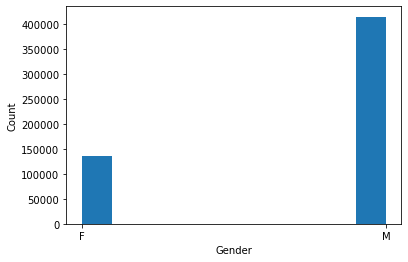

In [65]:
#Starting some exploratory data analysis. Analyzing whether males or females shop more on Black Friday. Surprisingly,
#the number of male shoppers are more than female shoppers.
plt.hist(bfriday_df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9407575070>,
      dtype=object)

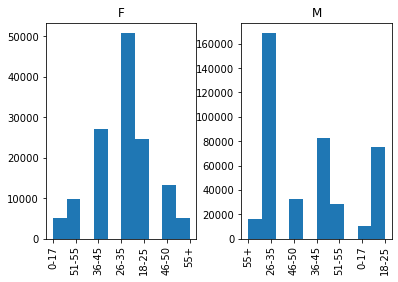

In [66]:
#age = bfriday_df['Age']
#gender = bfriday_df['Gender']
bfriday_df.Age.hist(by=bfriday_df.Gender)
#plt.hist([age])
#plt.show()

In [67]:
bfriday_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [68]:
#5891 unique users shopped on Black Friday
bfriday_df['User_ID'].nunique()

5891

In [69]:
#There are 3631 unique products
bfriday_df['Product_ID'].nunique()

3631

In [70]:
#Extracting all unique occupations
bfriday_df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [71]:
occupations = list(range(0,21))
total_purchase = []
for occ_id in occupations:
    total_purchase.append(bfriday_df[bfriday_df['Occupation'] == occ_id]['Purchase'].sum())

total_purchase

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617,
 296570442]

In [72]:
dic = {'Occupation':occupations,'Total Purchase':total_purchase}
dic

{'Occupation': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20],
 'Total Purchase': [635406958,
  424614144,
  238028583,
  162002168,
  666244484,
  113649759,
  188416784,
  557371587,
  14737388,
  54340046,
  115844465,
  106751618,
  305449446,
  71919481,
  259454692,
  118960211,
  238346955,
  393281453,
  60721461,
  73700617,
  296570442]}

In [74]:
dic_df = pd.DataFrame(dic)
dic_df

,Occupation,Total Purchase
0,0,635406958
1,1,424614144
2,2,238028583
3,3,162002168
4,4,666244484
5,5,113649759
6,6,188416784
7,7,557371587
8,8,14737388
9,9,54340046


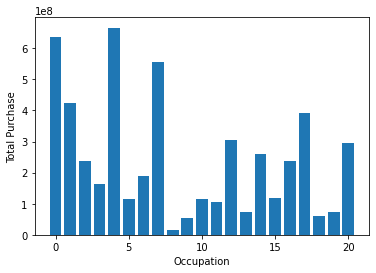

In [75]:
#Analysis of the total money spent on Black friday in each occupation. The most is spent by Occupation 4 and the least
#by Occupation 8.

plt.bar(dic_df['Occupation'],dic_df['Total Purchase'])
plt.xlabel('Occupation')
plt.ylabel('Total Purchase')
plt.show()

In [76]:
#This is to check the columns having null value. It makes sense to drop columns with most null values.
#Product_Category_3 has the most null values
bfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [87]:
#Dropping Product_Category_3 column.
bfriday_df = bfriday_df.drop(['Product_Category_3'],axis=1)

In [88]:
bfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [89]:
#The Product_Category_2 column also has 32% of the data missing. I will include it for now but remove it in case
#the accuracy of the machine learning algorithm is compromised. For now, I will fill the null columns with the
#mean value of the Product_Category_2 column.
bfriday_df['Product_Category_2'].fillna((bfriday_df['Product_Category_2'].mean()),inplace=True)

In [90]:
bfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [91]:
# We are trying to predict how much will be spent on Black Friday. For this we need to decide what all columns we
#need to include and what all we need to discard to build our ML algorithm. Here, User_ID and Product_ID seems to be 
#not useful to predict Purchase. Hence, dropping these two columns.
bfriday_df = bfriday_df.drop(['User_ID','Product_ID'],axis=1)

In [92]:
bfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


In [93]:
bfriday_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.842329,8370
1,F,0-17,10,A,2,0,1,6.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,1422
3,F,0-17,10,A,2,0,12,14.000000,1057
4,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.842329,368
550064,F,26-35,1,C,3,0,20,9.842329,371
550065,F,26-35,15,B,4+,1,20,9.842329,137
550066,F,55+,1,C,2,0,20,9.842329,365


In [95]:
gender_df = pd.get_dummies(bfriday_df['Gender'])
age_df = pd.get_dummies(bfriday_df['Age'])
city_category_df = pd.get_dummies(bfriday_df['City_Category'])
stay_current_city_df = pd.get_dummies(bfriday_df['Stay_In_Current_City_Years'])

bfriday_df_final = pd.concat([bfriday_df, gender_df, age_df, city_category_df, stay_current_city_df], axis=1)

bfriday_df_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.842329,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.000000,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.842329,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.000000,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.842329,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [98]:
#The dependent variable is Purchase.
y = bfriday_df_final['Purchase']

In [99]:
#These are the independent variables being used to make the Purchase prediction.
X = bfriday_df_final[['Occupation', 'Marital_Status', 'Product_Category_2', 'F', 'M', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3', '4+']]

In [100]:
#The data has been split into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [101]:
print(X_train.shape)
print(y_train.shape)

(412551, 20)
(412551,)


In [102]:
print(X_test.shape)
print(y_test.shape)

(137517, 20)
(137517,)


In [103]:
#Creating an object of Linear Regression class. Fitting the training set
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [104]:
print(regr.coef_)

[   8.62794873  -70.6534224  -213.77680922 -325.23530463  325.23530463
 -473.18058136  -76.37414599   73.29367264  116.02049003   27.4573152
  328.03552782    4.74772166 -339.6165297  -105.92678227  445.54331197
  -54.81990461  -11.74866636   35.87579588   27.83790066    2.85487443]


In [112]:
#Making the prediction
predictions = regr.predict(X_test)
predictions

array([10545.76712999,  9269.58621831, 10370.82666146, ...,
        9834.54691245,  7288.05094832,  9654.8381707 ])

In [113]:
# Lower the variance, better the prediction
y_pred= regr.predict(X_test)
print("Residual sum of squares: %.2f"% np.mean((y_pred - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X, y))

Residual sum of squares: 24246055.27
Variance score: 0.04
